## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading csv file in Dataframe

In [2]:
df=pd.read_csv("IPL Matches 2008-2020.csv")
df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [3]:
df_ball=pd.read_csv("IPL Ball-by-Ball 2008-2020.csv")
df_ball.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [5]:
# As it contains highest null values I decided to drop it
df.drop(["method"],axis=1,inplace=True)

In [6]:
df.isnull().sum()

id                  0
city               13
date                0
player_of_match     4
venue               0
neutral_venue       0
team1               0
team2               0
toss_winner         0
toss_decision       0
winner              4
result              4
result_margin      17
eliminator          4
umpire1             0
umpire2             0
dtype: int64

In [7]:
df.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'umpire1', 'umpire2'],
      dtype='object')

In [8]:
print('\nTeams :',df['team1'].unique())
# here we can see some team names are incorrect eg  ['Rising Pune Supergiants' 'Rising Pune Supergiant']


Teams : ['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Rising Pune Supergiant' 'Delhi Capitals']


In [9]:
df.replace(to_replace =['Rising Pune Supergiant','Pune Warriors'],
                value ='Rising Pune Supergiants',inplace=True)
df.replace(to_replace ='Delhi Daredevils',
                value ='Delhi Capitals',inplace=True)
df.replace(to_replace ='Deccan Chargers',
                value ='Sunrisers Hyderabad',inplace=True)

### Here we created another column Season which contain year only

In [10]:
df['Season'] = pd.DatetimeIndex(df['date']).year

In [11]:
print('Matches played so far :',df.shape[0])
print('\nTeams participated :',df['team1'].unique())
print('\nCities played at',df['city'].unique())

Matches played so far : 816

Teams participated : ['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Capitals'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Sunrisers Hyderabad' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Rising Pune Supergiants' 'Gujarat Lions']

Cities played at ['Bangalore' 'Chandigarh' 'Delhi' 'Mumbai' 'Kolkata' 'Jaipur' 'Hyderabad'
 'Chennai' 'Cape Town' 'Port Elizabeth' 'Durban' 'Centurion' 'East London'
 'Johannesburg' 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur'
 'Dharamsala' 'Kochi' 'Indore' 'Visakhapatnam' 'Pune' 'Raipur' 'Ranchi'
 'Abu Dhabi' nan 'Rajkot' 'Kanpur' 'Bengaluru' 'Dubai' 'Sharjah']


### Total matches Played in each season

In [12]:
match_per_season=df.groupby(['Season'])['id'].count().reset_index().rename(columns={'id':'matches'})
match_per_season
# Highest matches are played in 2013

,Season,matches
0,2008,58
1,2009,57
2,2010,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


C:\Users\Meghdeep\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


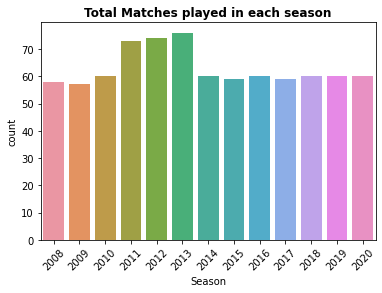

In [13]:
# Visualizing total matches played in each season
sns.countplot(df['Season'])
plt.xticks(rotation=45)
plt.title('Total Matches played in each season',fontweight='bold')
plt.show()

### Most wins in IPL

In [14]:
temp = pd.DataFrame({'winner': df['winner']})
count_wins = temp.value_counts()
count_wins

winner                     
Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Sunrisers Hyderabad             95
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Delhi Capitals                  86
Rajasthan Royals                81
Rising Pune Supergiants         27
Gujarat Lions                   13
Kochi Tuskers Kerala             6
dtype: int64

In [15]:
labels= [X[0] for X in count_wins.keys()]
labels

['Mumbai Indians',
 'Chennai Super Kings',
 'Kolkata Knight Riders',
 'Sunrisers Hyderabad',
 'Royal Challengers Bangalore',
 'Kings XI Punjab',
 'Delhi Capitals',
 'Rajasthan Royals',
 'Rising Pune Supergiants',
 'Gujarat Lions',
 'Kochi Tuskers Kerala']

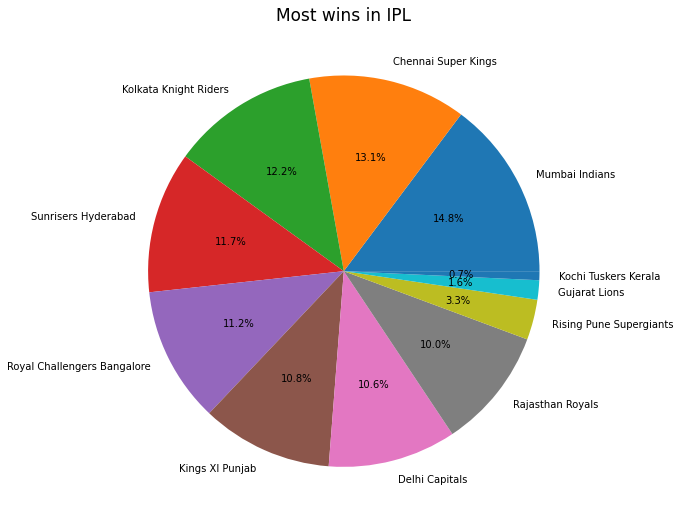

In [16]:
# Visualizing most wins in IPL
bar , ax = plt.subplots(figsize=(18,9))
ax = plt.pie( x = count_wins,autopct = "%.1f%%", labels=labels)
plt.title('Most wins in IPL',fontsize = 17)
plt.show()

### Most wins in eliminator

C:\Users\Meghdeep\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


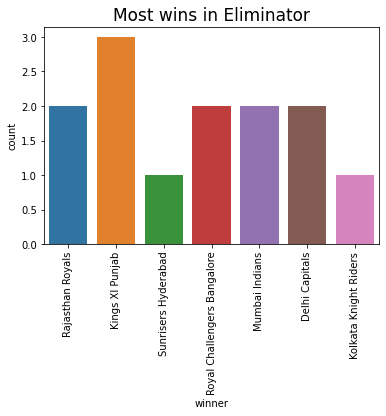

In [17]:
sns.countplot(df['winner'][df['eliminator']=='Y'], data=df)
plt.title("Most wins in Eliminator", fontsize=17)
plt.xticks(rotation=90)
plt.show()

### Toss Decision taken by teams

In [18]:
teams = df['toss_winner'].unique()
decision_making = pd.DataFrame([],columns={'Toss Winner','Decision','Times'})

for id, element in enumerate(teams):
    temp_bat = df[(df['toss_winner']==element) & (df['toss_decision']=='bat')]
    temp_field = df[(df['toss_winner']==element) & (df['toss_decision']=='field')]
    #append decision
    decision_making=decision_making.append({'Toss Winner': element , 
                                            'Decision':'bat','Times': temp_bat['toss_winner'].count()},ignore_index=True)
    decision_making=decision_making.append({'Toss Winner': element , 
                                            'Decision':'field','Times': temp_field['toss_winner'].count()},ignore_index=True)

In [19]:
decision_making

,Decision,Times,Toss Winner
0,bat,24,Royal Challengers Bangalore
1,field,63,Royal Challengers Bangalore
2,bat,51,Chennai Super Kings
3,field,46,Chennai Super Kings
4,bat,34,Rajasthan Royals
5,field,53,Rajasthan Royals
6,bat,48,Mumbai Indians
7,field,58,Mumbai Indians
8,bat,48,Sunrisers Hyderabad
9,field,52,Sunrisers Hyderabad


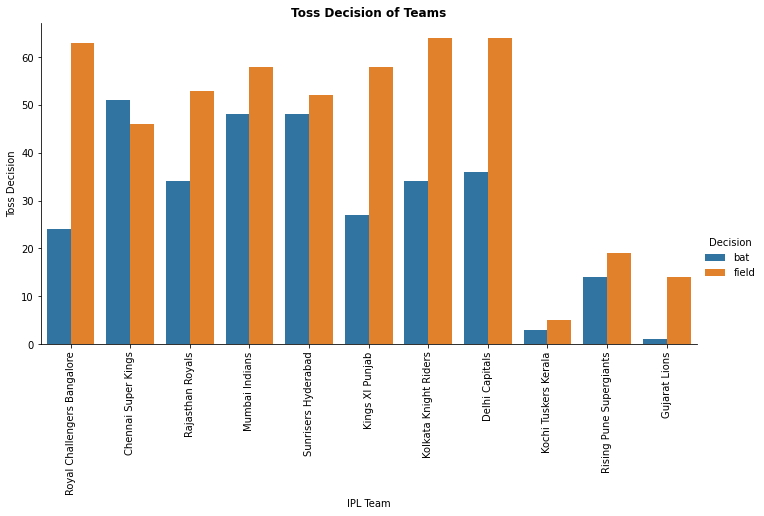

In [20]:
# Visualizing toss decision
sns.catplot(x = 'Toss Winner', y = 'Times', hue = 'Decision', data = decision_making, kind ='bar', height=5, aspect=2)
plt.xticks(rotation=90)
plt.title('Toss Decision of Teams',fontweight='bold')
plt.xlabel('IPL Team',fontsize=10)
plt.ylabel('Toss Decision',fontsize=10)
plt.show()

### Most matches played on venue (TOP 10)

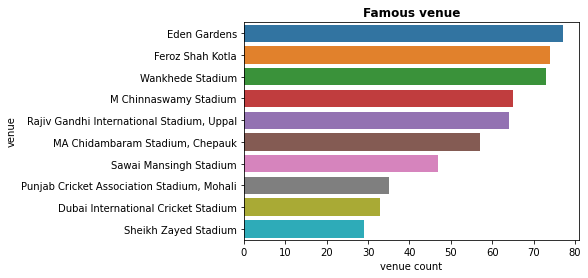

In [21]:
# famous venue
sns.barplot(x = df['venue'].value_counts().head(10).values,
           y = df['venue'].value_counts().head(10).index,
           data = df)
plt.title('Famous venue',fontweight='bold')
plt.xlabel('venue count',fontsize=10)
plt.ylabel('venue')
plt.show()

### top 5 1st umpire

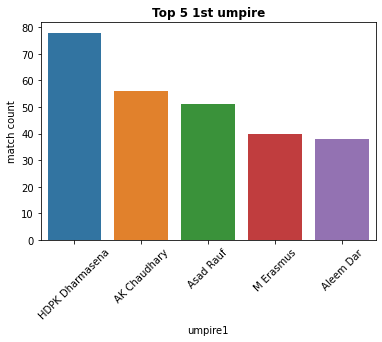

In [22]:
sns.barplot(x = df['umpire1'].value_counts().head().index,
           y = df['umpire1'].value_counts().head().values,
           data = df)
plt.xticks(rotation=45)
plt.title('Top 5 1st umpire',fontweight='bold')
plt.xlabel('umpire1')
plt.ylabel('match count')
plt.show()

### top 5 2st umpire

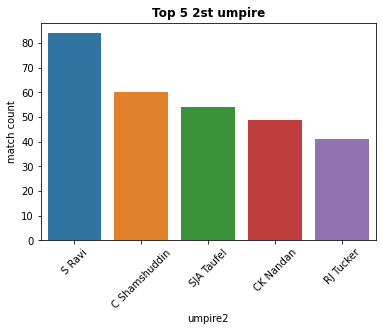

In [23]:
sns.barplot(x = df['umpire2'].value_counts().head().index,
           y = df['umpire2'].value_counts().head().values,
           data = df)
plt.xticks(rotation=45)
plt.title('Top 5 2st umpire',fontweight='bold')
plt.xlabel('umpire2')
plt.ylabel('match count')
plt.show()

### here i did left join on ball by ball and matches csv to get more information

In [24]:
season_data=df[['id','Season']].merge(df_ball, left_on= 'id',right_on= 'id',how = 'left').drop('id', axis=1)
season_data.head()

,Season,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,2008,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,2008,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,2008,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,2008,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,2008,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


### Total runs scored in each season

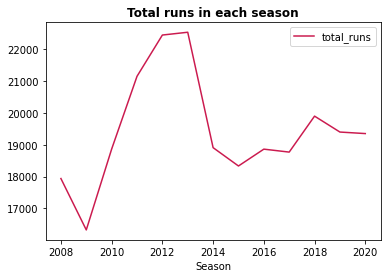

In [25]:
season=season_data.groupby(['Season'])['total_runs'].sum().reset_index()
p=season.set_index('Season')
ax = plt.axis()
sns.lineplot(data=p,palette='rocket')
plt.title('Total runs in each season',fontsize=12,fontweight='bold')
plt.show()
# in this we can see lowest runs are scored in 2009 and highest runs are scored in 2013 

### Matches won by wickets = chase , Matches won by runs = 1st batting team won

In [26]:
df['result'].value_counts()
# 2nd batting teams won 436 times 
# 1st batting teams won 364 times

wickets    435
runs       364
tie         13
Name: result, dtype: int64

### Which stadium is good for chasing(2nd batting)

In [27]:
df.venue[df.result!='runs'].mode()

0    Eden Gardens
dtype: object

### Which stadium is good for batting first

In [28]:
df.venue[df.result!='wickets'].mode()

0    Feroz Shah Kotla
dtype: object

###  Team who won most matches Batting 2st 

In [29]:
df.winner[df.result!='runs'].mode()

0    Kolkata Knight Riders
1           Mumbai Indians
dtype: object

### Team who won most matches Batting 1st 

In [30]:
df.winner[df.result!='wickets'].mode()

0    Mumbai Indians
dtype: object

### choosing bat or bowl first helps in winning match ?

C:\Users\Meghdeep\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


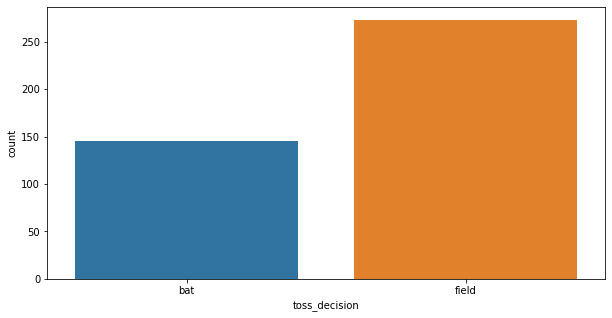

In [31]:
plt.figure(figsize=(10,5))
sns.countplot(df.toss_decision[df.toss_winner == df.winner])
plt.show()
# As per data the ans is yes choosing field first helps in winning match 

### Match won by highest margin

In [32]:
df[df['result_margin']==df['result_margin'].max()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2,Season
620,1082635,Delhi,2017-05-06,LMP Simmons,Feroz Shah Kotla,0,Delhi Capitals,Mumbai Indians,Delhi Capitals,field,Mumbai Indians,runs,146.0,N,Nitin Menon,CK Nandan,2017


### batsman who scored highest runs in IPL 

In [33]:
runs = df_ball.groupby('batsman')['batsman_runs'].sum().reset_index()
runs.columns=['batsman','runs']
r=runs.sort_values(by='runs', ascending=False).head(10).reset_index().drop('index', axis=1)
r

,batsman,runs
0,V Kohli,5878
1,SK Raina,5368
2,DA Warner,5254
3,RG Sharma,5230
4,S Dhawan,5197
5,AB de Villiers,4849
6,CH Gayle,4772
7,MS Dhoni,4632
8,RV Uthappa,4607
9,G Gambhir,4217


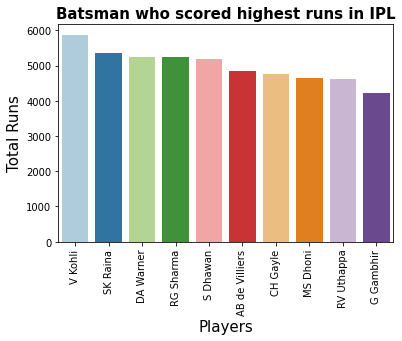

In [34]:
# Visualizing Batsman who scored highest runs in IPL
ax = plt.axes()
sns.barplot(x=r['batsman'],y=r['runs'],palette='Paired')
plt.xticks(rotation=90)
plt.title("Batsman who scored highest runs in IPL",fontweight='bold',fontsize=15)
plt.xlabel('Players',fontsize=15)
plt.ylabel('Total Runs',fontsize=15)
plt.show()

### Player who won highest Man of the match award

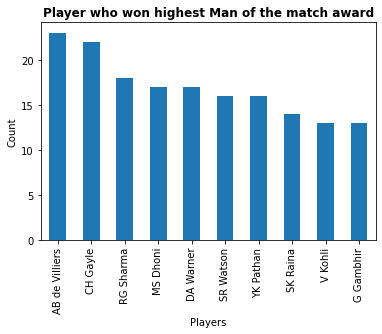

In [35]:
ax = plt.axes()
df.player_of_match.value_counts()[:10].plot(kind='bar')
plt.title('Player who won highest Man of the match award',fontweight='bold')
plt.xlabel('Players')
plt.ylabel('Count')
plt.show()

## Analysing Mumbai Indians Batting Data

In [36]:
# we made a another data frame contains data of a team mumbai indians for batting
team_mi = (df_ball['batting_team']=='Mumbai Indians')
df_team_mi = df_ball[team_mi]
df_team_mi.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
692,335985,1,0,2,L Ronchi,ST Jayasuriya,P Kumar,4,0,4,0,0,NaN,NaN,NaN,NaN,Mumbai Indians,Royal Challengers Bangalore
693,335985,1,0,1,L Ronchi,ST Jayasuriya,P Kumar,0,0,0,0,0,NaN,NaN,NaN,NaN,Mumbai Indians,Royal Challengers Bangalore
694,335985,1,0,6,L Ronchi,ST Jayasuriya,P Kumar,0,0,0,0,0,NaN,NaN,NaN,NaN,Mumbai Indians,Royal Challengers Bangalore
695,335985,1,0,3,L Ronchi,ST Jayasuriya,P Kumar,0,0,0,0,0,NaN,NaN,NaN,NaN,Mumbai Indians,Royal Challengers Bangalore
696,335985,1,0,4,L Ronchi,ST Jayasuriya,P Kumar,0,0,0,0,0,NaN,NaN,NaN,NaN,Mumbai Indians,Royal Challengers Bangalore


In [37]:
df_team_mi['dismissal_kind'].value_counts()

caught               738
bowled               190
run out              101
lbw                   86
stumped               33
caught and bowled     32
retired hurt           7
hit wicket             2
Name: dismissal_kind, dtype: int64

### Dismissal kind of mumbai indians batsman

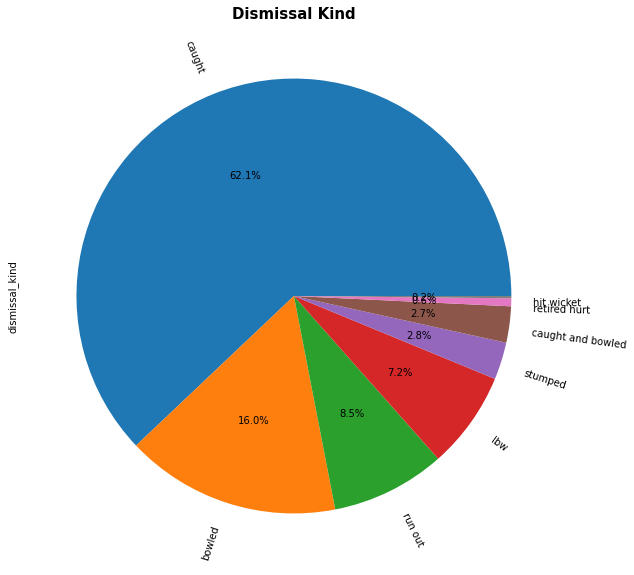

In [38]:
plt.figure(figsize=(20,10))
df_team_mi['dismissal_kind'].value_counts().plot.pie(autopct='%1.1f%%',rotatelabels=True)
plt.title("Dismissal Kind",fontweight='bold',fontsize=15)
plt.show()

### Count of runs scored by team batsman

In [39]:
def count(df_team_mi,runs):
    return len(df_team_mi[df_team_mi['batsman_runs']==runs])*runs

In [40]:
print("Runs scored from 1's :",count(df_team_mi,1))
print("Runs scored from 2's :",count(df_team_mi,2))
print("Runs scored from 3's :",count(df_team_mi,3))
print("Runs scored from 4's :",count(df_team_mi,4))
print("Runs scored from 6's :",count(df_team_mi,6))

# mumbai indians scored highest runs by 4's

Runs scored from 1's : 8839
Runs scored from 2's : 2830
Runs scored from 3's : 219
Runs scored from 4's : 11200
Runs scored from 6's : 7404


## Analysing Mumbai Indians Bowling Data

In [42]:
# we made a another data frame contains data of a team mumbai indians for bowling
team1_mi = (df_ball['bowling_team']=='Mumbai Indians')
df_team1_mi = df_ball[team1_mi]
df_team1_mi.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
773,335985,2,0,1,S Chanderpaul,R Dravid,A Nehra,0,0,0,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Mumbai Indians
774,335985,2,0,2,S Chanderpaul,R Dravid,A Nehra,1,0,1,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Mumbai Indians
775,335985,2,0,3,R Dravid,S Chanderpaul,A Nehra,0,0,0,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Mumbai Indians
776,335985,2,0,4,R Dravid,S Chanderpaul,A Nehra,1,0,1,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Mumbai Indians
777,335985,2,0,5,S Chanderpaul,R Dravid,A Nehra,4,0,4,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Mumbai Indians


In [43]:
df_team1_mi['dismissal_kind'].value_counts()

caught               752
bowled               227
run out              107
lbw                   73
caught and bowled     40
stumped               36
hit wicket             2
Name: dismissal_kind, dtype: int64

### Dismissal of another team batsman done by Mumbai indians

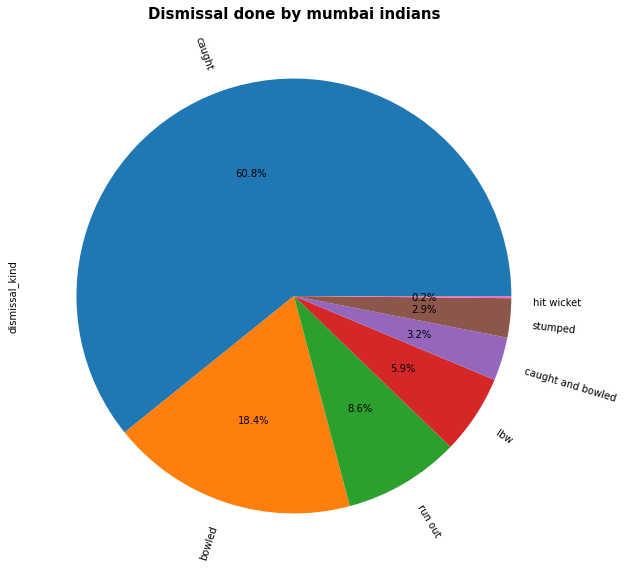

In [44]:
plt.figure(figsize=(20,10))
df_team1_mi['dismissal_kind'].value_counts().plot.pie(autopct='%1.1f%%',rotatelabels=True)
plt.title("Dismissal done by mumbai indians",fontweight='bold',fontsize=15)
plt.show()
# here we can see mumbai indians took highest wicket by catch

## Analysing Rohit Sharma's Data 

In [45]:
# we made a another data frame contains data of a single player Rohit sharma
rohit = (df_ball['batsman'] == 'RG Sharma')
df_rohit = df_ball[rohit]
df_rohit.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
1070,335986,1,8,2,RG Sharma,A Symonds,M Kartik,0,0,0,0,0,NaN,NaN,NaN,NaN,Deccan Chargers,Kolkata Knight Riders
1071,335986,1,8,3,RG Sharma,A Symonds,M Kartik,0,0,0,0,0,NaN,NaN,NaN,NaN,Deccan Chargers,Kolkata Knight Riders
1072,335986,1,8,4,RG Sharma,A Symonds,M Kartik,0,0,0,0,1,caught,RG Sharma,WP Saha,NaN,Deccan Chargers,Kolkata Knight Riders
1458,335988,1,13,3,RG Sharma,SB Bangar,VY Mahesh,1,0,1,0,0,NaN,NaN,NaN,NaN,Deccan Chargers,Delhi Daredevils
1460,335988,1,13,5,RG Sharma,SB Bangar,VY Mahesh,1,0,1,0,0,NaN,NaN,NaN,NaN,Deccan Chargers,Delhi Daredevils


### Dismissal kind of rohit sharma 

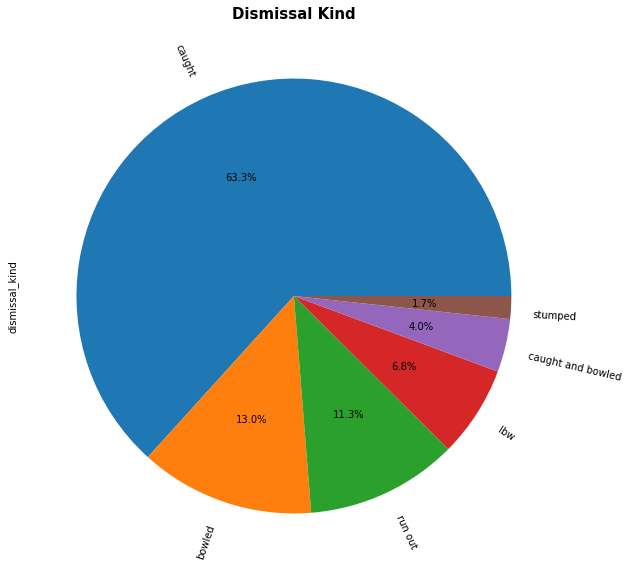

In [46]:
plt.figure(figsize=(20,10))
df_rohit['dismissal_kind'].value_counts().plot.pie(autopct='%1.1f%%',rotatelabels=True)
plt.title("Dismissal Kind",fontweight='bold',fontsize=15)
plt.show()

### Count of runs scored by rohit sharma

In [47]:
def count(df_rohit,runs):
    return len(df_rohit[df_rohit['batsman_runs']==runs])*runs

In [48]:
print("Runs scored from 1's :",count(df_rohit,1))
print("Runs scored from 2's :",count(df_rohit,2))
print("Runs scored from 3's :",count(df_rohit,3))
print("Runs scored from 4's :",count(df_rohit,4))
print("Runs scored from 6's :",count(df_rohit,6))

Runs scored from 1's : 1663
Runs scored from 2's : 428
Runs scored from 3's : 18
Runs scored from 4's : 1832
Runs scored from 6's : 1284


In [50]:
# Highest Scoring batsman in Mumbai Indians
top_mi_bat = df_team_mi.groupby('batsman')['batsman_runs'].sum().reset_index()
top_mi_bat.columns=['batsman','runs']
t_m_b=runs.sort_values(by='runs', ascending=False).head(10).reset_index().drop('index', axis=1)
t_m_b

,batsman,runs
0,V Kohli,5878
1,SK Raina,5368
2,DA Warner,5254
3,RG Sharma,5230
4,S Dhawan,5197
5,AB de Villiers,4849
6,CH Gayle,4772
7,MS Dhoni,4632
8,RV Uthappa,4607
9,G Gambhir,4217
